In [57]:
import pandas as pd

In [58]:
!pwd

/home/roustchevd/workspace/pyconUS2015/winning_ml_competitions_w_scikit-learn/pycon2015-kaggle-tutorial/1


In [90]:
train = pd.read_csv("../input/train.csv", parse_dates=['PostCreationDate','OwnerCreationDate'])

In [91]:
train.head()

,Unnamed: 0,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,0,6046168,2011-05-18 14:14:05,543315,2010-09-17 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,NaN,NaN,NaN,NaN,1
1,1,4873911,2011-02-02 11:30:10,465076,2010-10-03 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,jaxp,NaN,NaN,NaN,1
2,2,3311559,2010-07-22 17:21:54,406143,2010-07-22 16:58:20,1,0,Too many lookup tables,What are the adverse effects of having too man...,sql-server,database-design,enums,NaN,NaN,NaN,1
3,3,9990413,2012-04-03 09:18:39,851755,2011-07-19 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,vb.net,NaN,NaN,NaN,04/15/2012 21:12:48,0
4,4,10421966,2012-05-02 21:25:01,603588,2011-02-04 18:05:34,334,14,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,spring-data,NaN,NaN,NaN,NaN,1


In [94]:
train.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
PostId,6046168,4873911,3311559,9990413,10421966
PostCreationDate,2011-05-18 14:14:05,2011-02-02 11:30:10,2010-07-22 17:21:54,2012-04-03 09:18:39,2012-05-02 21:25:01
OwnerUserId,543315,465076,406143,851755,603588
OwnerCreationDate,2010-09-17 10:15:06,2010-10-03 09:30:58,2010-07-22 16:58:20,2011-07-19 10:22:40,2011-02-04 18:05:34
ReputationAtPostCreation,1,192,1,4,334
OwnerUndeletedAnswerCountAtPostTime,2,24,0,1,14
Title,For Mongodb is it better to reference an objec...,How to insert schemalocation in a xml document...,Too many lookup tables,What is this PHP code in VB.net,Spring-Data mongodb querying multiple classes ...
BodyMarkdown,I am building a corpus of indexed sentences in...,i create a xml document with JAXP and search a...,What are the adverse effects of having too man...,I am looking for the vb.net equivalent of this...,"With Spring-Data, you can use the @Document an..."
Tag1,mongodb,dom,sql-server,php,mongodb


In [93]:
train["TitleLength"] = train.Title.apply(len)
train['TimeToPost'] = train.PostCreationDate.astype('i8') - train.OwnerCreationDate.astype('i8')

(array([  3.57020000e+04,   6.57980000e+04,   2.93590000e+04,
          7.44800000e+03,   1.57500000e+03,   3.80000000e+02,
          5.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          3.00000000e+00]),
 array([  10.,   34.,   58.,   82.,  106.,  130.,  154.,  178.,  202.,
         226.,  250.]),
 <a list of 10 Patch objects>)

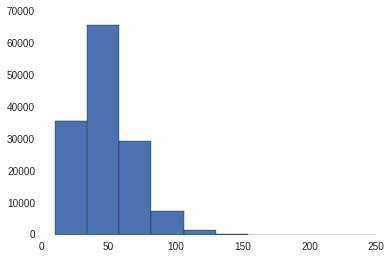

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

plt.hist(train.TitleLength.values)

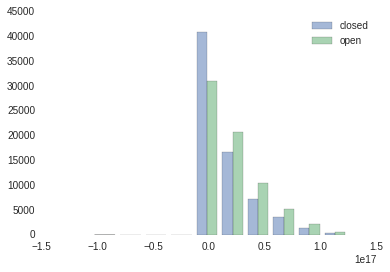

In [98]:
#plt.hist([train[train.OpenStatus==0].TitleLength.values, 
#          train[train.OpenStatus==1].TitleLength.values],
#         label = ["closed", "open"],
#         alpha=.5);
#plt.legend()

plt.hist([train[train.OpenStatus==0].TimeToPost.values,
          train[train.OpenStatus==1].TimeToPost.values],
         label = ['closed', 'open'],
        alpha=.5);
plt.legend()

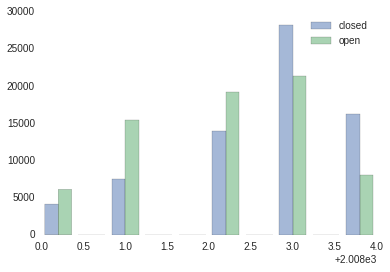

In [76]:
plt.hist([train[train.OpenStatus==0].OwnerCreationYear.values,
          train[train.OpenStatus==1].OwnerCreationYear.values],
         label = ['closed', 'open'],
        alpha=.5);
plt.legend()

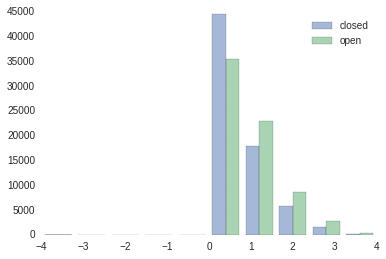

In [79]:
plt.hist([train[train.OpenStatus==0].TimeToPost.values,
          train[train.OpenStatus==1].TimeToPost.values],
         label = ['closed', 'open'],
        alpha=.5);
plt.legend()

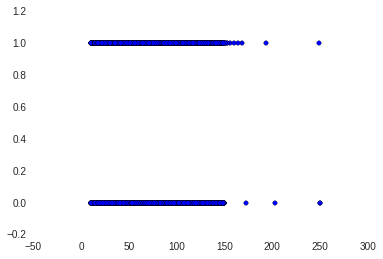

In [12]:
plt.scatter(train.TitleLength, train.OpenStatus)

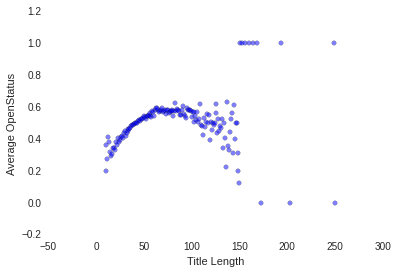

In [13]:
mean_status_by_length = train.groupby("TitleLength").OpenStatus.mean()
mean_status_by_length_df = pd.DataFrame(mean_status_by_length).reset_index()

# add random errors with a normal distribution                      
length_status_scatter = plt.scatter(mean_status_by_length_df.TitleLength, mean_status_by_length_df.OpenStatus, alpha=.5)
length_status_scatter
plt.xlabel("Title Length")
plt.ylabel("Average OpenStatus")

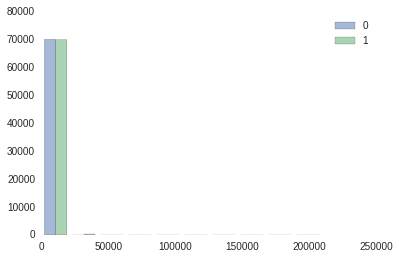

In [14]:
plt.hist([train[train.OpenStatus==0].ReputationAtPostCreation.values, 
          train[train.OpenStatus==1].ReputationAtPostCreation.values],
         label = [0, 1],
         alpha=.5);
plt.legend()

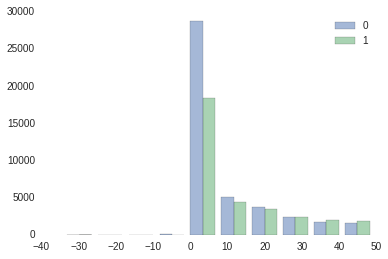

In [15]:
train_low_rep = train[train.ReputationAtPostCreation < 50]
plt.hist([train_low_rep[train_low_rep.OpenStatus==0].ReputationAtPostCreation.values, 
          train_low_rep[train_low_rep.OpenStatus==1].ReputationAtPostCreation.values],
         label = [0, 1],
         alpha=.5);
plt.legend()


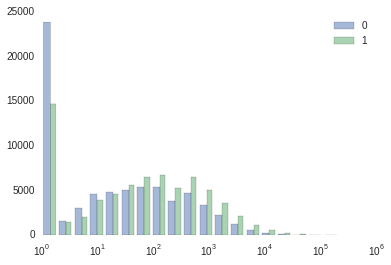

In [16]:
bins = np.logspace(0, np.log10(np.max(train.ReputationAtPostCreation.values)), num=20)
plt.xscale("log")
plt.hist([train[train.OpenStatus==0].ReputationAtPostCreation.values, 
          train[train.OpenStatus==1].ReputationAtPostCreation.values],
         bins = bins,
         label = [0, 1],
         alpha=.5);
plt.legend()


In [112]:
%run 1.py

In [113]:
train = load_feature_matrix("../input/train.csv")

In [114]:
test = load_feature_matrix("../input/test.csv")

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
br = RandomForestClassifier()

In [151]:
columns = ["ReputationAtPostCreation", "TitleLength", 'TimeToPost']
lr.fit(X = np.asarray(train[columns]), 
       y = np.asarray(train.OpenStatus).transpose())

br.fit(X = np.asarray(train[columns]),
       y = np.asarray(train.OpenStatus).transpose())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [152]:
lr.predict(np.asarray(train[columns]))
np.mean(lr.predict(np.asarray(train[columns])) == train.OpenStatus)

0.49997148397399338

In [153]:
br.predict(np.asarray(train[columns]))
np.mean(br.predict(np.asarray(train[columns])) == train.OpenStatus)

0.94802954260294281

In [118]:
lr.predict_proba(np.asarray(test[columns]))[:,1]

array([ 0.56551797,  0.50000472,  0.51888413, ...,  0.50106996,
        0.50922079,  0.50569236])

In [154]:
br.predict_proba(np.asarray(test[columns]))[:,1]

array([ 0.3,  1. ,  0.7, ...,  0.1,  0.6,  0.6])

In [157]:
predictions = lr.predict_proba(np.asarray(test[columns]))[:,1]
br_predictions = br.predict_proba(np.asarray(test[columns]))[:,1]
predictions = (predictions + br_predictions)/2
predictions

array([ 0.43275898,  0.75000236,  0.60944206, ...,  0.30053498,
        0.55461039,  0.55284618])

In [158]:
!head ../input/even_odds_sample_submission.csv

"id","open"
11768878,0.5
11768880,0.5
11803678,0.5
11803496,0.5
11803700,0.5
11927241,0.5
11927226,0.5
11927247,0.5
11927248,0.5


In [159]:
submission = pd.DataFrame({"id": test.PostId, "OpenStatus": predictions})

In [160]:
!mkdir ../submissions
submission.to_csv("../submissions/submission_8.csv")

mkdir: cannot create directory ‘../submissions’: File exists


In [161]:
!head ../submissions/submission_8.csv

,OpenStatus,id
0,0.43275898398649426,11768878
1,0.7500023618201216,11768880
2,0.6094420641178188,11803678
3,0.5632095735132148,11803496
4,0.6218538233057578,11803700
5,0.43399613039058305,11927241
6,0.5214469848128398,11927226
7,0.25645671048051477,11927247
8,0.5479407172185686,11927248


In [162]:
submission.to_csv("../submissions/submission_8.csv", index = False)

In [163]:
!head ../submissions/submission_8.csv

OpenStatus,id
0.43275898398649426,11768878
0.7500023618201216,11768880
0.6094420641178188,11803678
0.5632095735132148,11803496
0.6218538233057578,11803700
0.43399613039058305,11927241
0.5214469848128398,11927226
0.25645671048051477,11927247
0.5479407172185686,11927248


# Let's submit 

https://inclass.kaggle.com/c/pycon-2015-tutorial

"Log loss" is based on:

$$\prod_{i=1}^N \text{probability that prediction i is correct}$$

# Homework

- explore more features!
- make your own submission!


